Sheet 07

(a)

$\lambda > 30$, $\mu = \lambda$, $\lambda = \sigma^2$

(b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

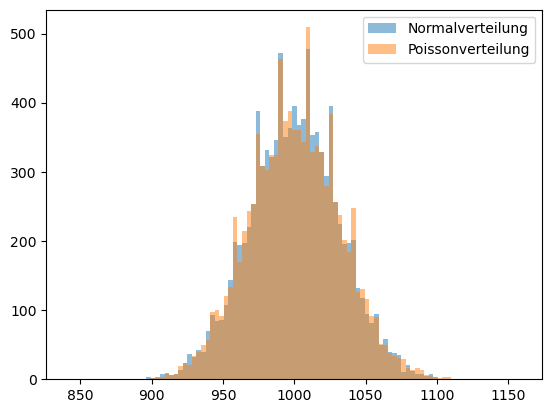

In [2]:
def kog_smir_test(X, Y, alpha):
    if len(X) != len(Y):
        print("X and Y have different binning")
        return False
    else:
        n_x = np.sum(X) #sample size
        n_y = np.sum(Y) 
        X_cum = np.cumsum(X)/n_x #ecdf
        Y_cum = np.cumsum(Y)/n_y
        d_max = np.max(np.abs(X_cum - Y_cum)) #maximum distance
        K_alpha = np.sqrt(-0.5*np.log(alpha/2)) #critical value
        if d_max * np.sqrt(n_x*n_y/(n_x+n_y)) > K_alpha: 
            print("Nullhypothese wird verworfen")
            return False 
        else:
            print("Nullhypothese wird akzeptiert")
            return True

#kog_smir aus scipy
#import scipy.stats as stats
#def ks_2samp(X, Y, alpha):
#    if len(X) != len(Y):
#        print("X and Y have different binning")
#        return False
#    else:
#        if stats.ks_2samp(X, Y)[1] < alpha:
#            print("Nullhypothese wird verworfen")
#            return False
#        else:
#            print("Nullhypothese wird akzeptiert")
#            return True
    


def data(mu, size=10000, bins=100):
    #aus (a)
    sigma = np.sqrt(mu)
    X = np.random.normal(mu, sigma, size) #normalverteilt
    Y = np.random.poisson(mu, size) #poissonverteilt
    X = np.round(X) #runden
    bins_ = np.linspace(-5*sigma+mu, 5*sigma+mu, bins) #bins von -5sigma bis 5sigma, insgesamt 100 bins
    X_binned = np.histogram(X, bins=bins_) #raw data in bins
    Y_binned = np.histogram(Y, bins=bins_)
    return bins_, X_binned, Y_binned

bins, X, Y = data(1000)

width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, X[0], align='center', width=width, label="Normalverteilung", alpha=0.5)
plt.bar(center, Y[0], align='center', width=width, label="Poissonverteilung", alpha=0.5)
plt.legend()


In [3]:
results = np.zeros(5000)
for i in range(1,5000):
    bins, X, Y = data(i) #lambda = i Erwartungswert durchlaufen
    results[i] = kog_smir_test(X[0], Y[0], 0.05) 
    if results[i] == True: #erstes i, bei dem Nullhypothese nicht mehr verworfen wird
       print(i)
       break


Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
10


Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert
Nullhypothese wird akzeptiert

Text(0.5, 0, 'Erwartungswert')

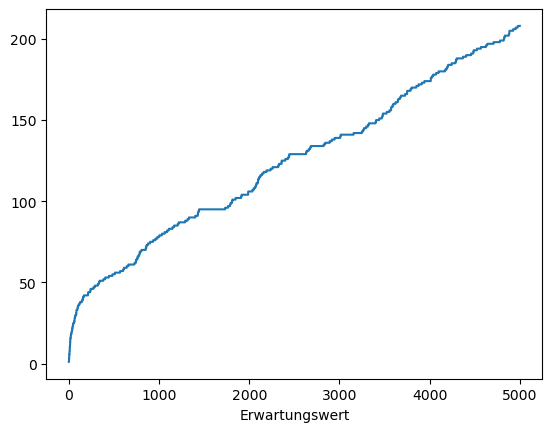

In [4]:
results = np.zeros(5000)
for i in range(1,5000):
    bins, X, Y = data(i) #lambda = i Erwartungswert durchlaufen
    results[i] = kog_smir_test(X[0], Y[0], 0.05) 

cum_results = np.cumsum(results == False) #kumulierte Summe der verworfenen Nullhypothesen

plt.step(range(5000), cum_results, where='post')
plt.xlabel("Erwartungswert")



Auch bei höheren EW kann der Test teilweise nicht unterscheiden. Kurve flacht aber ab?

(d)

In [5]:
#alpha = 0.025
results = np.zeros(5000)
for i in range(1,5000):
    bins, X, Y = data(i) #lambda = i Erwartungswert durchlaufen
    results[i] = kog_smir_test(X[0], Y[0], 0.025) 
    if results[i] == True: #erstes i, bei dem Nullhypothese nicht mehr verworfen wird
       print(i)
       break

Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
9


In [6]:
#alpha = 0.001
results = np.zeros(5000)
for i in range(1,5000):
    bins, X, Y = data(i) #lambda = i Erwartungswert durchlaufen
    results[i] = kog_smir_test(X[0], Y[0], 0.001) 
    if results[i] == True: #erstes i, bei dem Nullhypothese nicht mehr verworfen wird
       print(i)
       break

Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird verworfen
Nullhypothese wird akzeptiert
6
